# Parsing SFS from VCF file

fastDFE provides parser utilities that enable convenient parsing of frequency spectra from VCF files. By default, {class}`~fastdfe.parser.Parser` looks at the ``AA`` tag in the VCF file's info field to retrieve the correct polarization. Sites for which this tag is not well-defined are by default included (see {attr}`~fastdfe.parser.Parser.skip_not_polarized`). Note that non-polarized frequency spectra provide little information on the distribution of beneficial mutations.

We also might want to stratify the SFS by some property of the sites, such as synonymous vs. non-synonymous mutations. This is done by specifying a list of stratifications to the parser. In this example, we will stratify the SFS by synonymous vs. non-synonymous mutations using a VCF file for `Betula spp.`.

In [5]:
from fastdfe import Parser, DegeneracyStratification, Spectra

vcf_file = "../../resources/genome/betula/all.vcf.gz"

# instantiate parser
p = Parser(
    n=10,
    vcf_file=vcf_file,
    stratifications=[DegeneracyStratification()]
)

# parse SFS
spectra: Spectra = p.parse()

INFO:fastdfe:Using stratification: [neutral,selected].
INFO:fastdfe:Counting number of sites.


2439037it [00:56, 43135.21it/s]

INFO:fastdfe:Starting to parse.



100%|██████████| 2439037/2439037 [02:54<00:00, 14013.47it/s]


<Figure size 640x480 with 0 Axes>

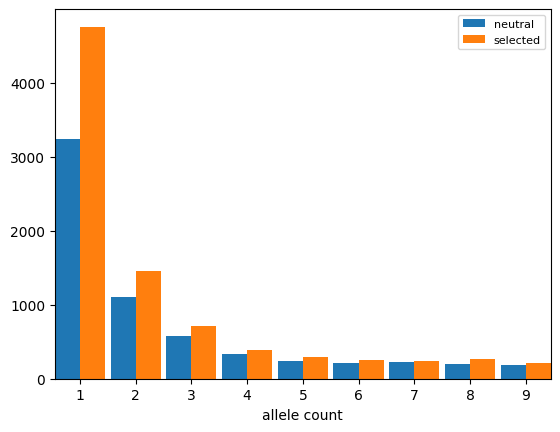

In [6]:
# visualize SFS
spectra.plot();

fastDFE relies on VCF info tags to determine the degeneracy of a site but this behaviour can be customized (cf. {class}`~fastdfe.parser.DegeneracyStratification`).

We can also increase the number of stratifications by specifying a list of stratifications. In this example, we will stratify the SFS by synonymous vs. non-synonymous mutations and by base transitions.

In [7]:
from fastdfe import ReferenceBaseStratification

# instantiate parser
p = Parser(
    n=10,
    vcf_file=vcf_file,
    stratifications=[DegeneracyStratification(), ReferenceBaseStratification()]
)

# parse SFS
spectra: Spectra = p.parse()

INFO:fastdfe:Using stratification: [neutral,selected].[A,C,G,T].
INFO:fastdfe:Counting number of sites.


2439037it [00:45, 53268.04it/s]

INFO:fastdfe:Starting to parse.



100%|██████████| 2439037/2439037 [02:44<00:00, 14789.53it/s]


<Figure size 640x480 with 0 Axes>

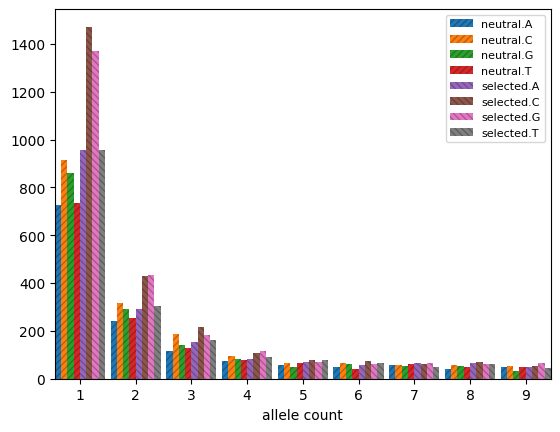

In [8]:
# visualize SFS
spectra.plot();

Note that fastDFE required the ancestral state of sites to be determined. {class}`~fastdfe.parser.Parser` does this by looking at the ``AA`` field but this can be customized. We admit there is currently no easy method for determining the ancestral states directly from a VCF file and are working on implementing one. You can also define custom Stratifications by extending {class}`~fastdfe.parser.Stratification`).